In [1]:
import numpy as np
import matplotlib.pyplot as pl
from n_layers_network import *

In [2]:
from keras.datasets import mnist

(train_X_orig, train_y_orig), (test_X_orig, test_y_orig) = mnist.load_data()

print('X_train: ' + str(train_X_orig.shape))
print('Y_train: ' + str(train_y_orig.shape))
print('X_test:  '  + str(test_X_orig.shape))
print('Y_test:  '  + str(test_y_orig.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [3]:
# normalized the data
train_X_flatten = train_X_orig.reshape(train_X_orig.shape[0], -1).T
train_X = train_X_flatten / 256
test_X_flatten = test_X_orig.reshape(test_X_orig.shape[0], -1).T
test_X = test_X_flatten / 256

# one hot encoder
train_y = np.zeros((10, train_y_orig.shape[0]))
test_y = np.zeros((10, test_y_orig.shape[0]))
for count, y in enumerate(train_y_orig):
    train_y[y][count] = 1
for count, y in enumerate(test_y_orig):
    test_y[y][count] = 1

train_X.shape, train_y.shape

((784, 60000), (10, 60000))

In [4]:
def create_mini_batches(X, y, batch_size): 
    mini_batches = []
    data = np.vstack((X, y))
    #np.random.shuffle(data)

    n_minibatches = data.shape[1] // batch_size

    for i in range(n_minibatches):
        mini_batch = data[:, i * batch_size:(i + 1)*batch_size]
        X_mini = mini_batch[:-10, :]
        Y_mini = mini_batch[-10:, :]
        mini_batches.append((X_mini, Y_mini))

    if data.shape[1] % batch_size != 0:
        mini_batch = data[:, i * batch_size: data.shape[1]]
        X_mini = mini_batch[:-10, :]
        Y_mini = mini_batch[-10:, :]
        mini_batches.append((X_mini, Y_mini))
    
    return mini_batches

In [5]:
def L_layer_model(train_X, train_y, test_X, test_y, layers_dimensions, num_iterations, learning_rate=0.1, mini_batch_size=64, print_cost=False): 

    costs = []

    # initialize model
    parameters = initialize_parameters(layers_dimensions)

    for i in range(0, num_iterations):

        # create new mini batches
        mini_batches = create_mini_batches(train_X, train_y, mini_batch_size)
        
        batch_costs = []
        for mini_batch in mini_batches: 
            
            X_mini, y_mini = mini_batch

            # forward propagation
            AL, caches = forward_propagation(X_mini, parameters)

            # compute cost
            cost = compute_cost(AL, y_mini)
            batch_costs.append(cost)

            # backward propatation
            grads = backward_propagation(AL, y_mini, caches)

            # updata parameters
            parameters = update_parameters(parameters, grads, learning_rate)
        
        # print cost value every 10 epoches
        avg_cost = np.mean(batch_costs)
        if print_cost and i % 10 == 0: 
            print ("Cost after epoch %i: %f" %(i, avg_cost))
        costs.append(avg_cost)

    # plot the cost
    plt.plot(costs, label='training')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

Cost after epoch 0: 0.483082
Cost after epoch 10: 0.135406
Cost after epoch 20: 0.110099
Cost after epoch 30: 0.096205
Cost after epoch 40: 0.087586
Cost after epoch 50: 0.081450
Cost after epoch 60: 0.076282
Cost after epoch 70: 0.074141
Cost after epoch 80: 0.071756
Cost after epoch 90: 0.068113
Cost after epoch 100: 0.066378
Cost after epoch 110: 0.064265
Cost after epoch 120: 0.063775
Cost after epoch 130: 0.061866
Cost after epoch 140: 0.066350
Cost after epoch 150: 0.058551
Cost after epoch 160: 0.064592
Cost after epoch 170: 0.062744
Cost after epoch 180: 0.059834
Cost after epoch 190: 0.054337


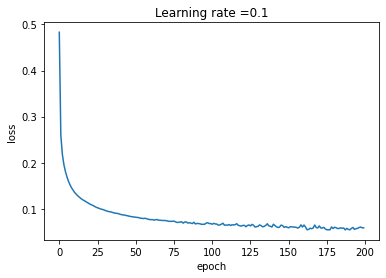

In [6]:
layers_dimensions = [784, 16, 16, 10]

parameters = L_layer_model(train_X, train_y, test_X, test_y, layers_dimensions, num_iterations=200, learning_rate=0.1, mini_batch_size=64, print_cost=True)

In [7]:
from sklearn.metrics import accuracy_score
y_hat = predict(test_X, parameters)
accuracy_score(test_y_orig, y_hat)

0.9308